In [39]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.13.0


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models


In [41]:
df = pd.read_csv('Boston.csv')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0,NaN,NaN
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0,NaN,NaN
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,0,NaN,NaN
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0,NaN,NaN
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0,NaN,NaN


In [42]:
df.drop(columns=['Unnamed: 15','Unnamed: 16'],inplace=True)

In [43]:
df.drop(columns=['CAT. MEDV'],inplace=True)

In [44]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [46]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [47]:
df.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [14]:
X = df.loc[:,['LSTAT','PTRATIO','RM']]
Y = df.loc[:,"MEDV"]
X.shape,Y.shape


((506, 3), (506,))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(x_train)

StandardScaler()

In [19]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 3), (102, 3), (404,), (102,))

# Build the Deep Neural Network Model

In [21]:
from tensorflow.keras import models, layers

In [22]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # First hidden layer
    layers.Dense(64, activation='relu'),  # Second hidden layer
    layers.Dense(1)  # Output layer for regression (single neuron)
])

In [23]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Train Model

In [24]:
history = model.fit(
    x_train, y_train,
    epochs=100,  # You can increase or decrease the number of epochs
    batch_size=32,
    validation_split=0.2,  # 20% of training data will be used for validation
    verbose=1  # Set to 1 to see the progress
)

Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 623.1335 - mae: 23.0526 - val_loss: 547.9240 - val_mae: 21.8596
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 595.8430 - mae: 22.4563 - val_loss: 523.0518 - val_mae: 21.3008
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 567.8542 - mae: 21.8523 - val_loss: 496.5082 - val_mae: 20.6759
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 537.1454 - mae: 21.1224 - val_loss: 463.3593 - val_mae: 19.8783
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 496.9270 - mae: 20.1808 - val_loss: 420.0800 - val_mae: 18.7936
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 444.7879 - mae: 18.8904 - val_loss: 363.8771 - val_mae: 17.3706
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 378.9465 - mae: 17.2257 - val_loss: 297.8656 - val_mae: 15.6188
Epoch 8/100
11/11 [====================

Epoch 62/100
11/11 [==============================] - 0s 8ms/step - loss: 19.4293 - mae: 3.2369 - val_loss: 21.7862 - val_mae: 2.9476
Epoch 63/100
11/11 [==============================] - 0s 7ms/step - loss: 19.2408 - mae: 3.2507 - val_loss: 21.9033 - val_mae: 2.9703
Epoch 64/100
11/11 [==============================] - 0s 7ms/step - loss: 19.1410 - mae: 3.2416 - val_loss: 21.6406 - val_mae: 2.9223
Epoch 65/100
11/11 [==============================] - 0s 7ms/step - loss: 19.1652 - mae: 3.2246 - val_loss: 21.8787 - val_mae: 2.9410
Epoch 66/100
11/11 [==============================] - 0s 6ms/step - loss: 19.0800 - mae: 3.2365 - val_loss: 22.0301 - val_mae: 2.9995
Epoch 67/100
11/11 [==============================] - 0s 6ms/step - loss: 18.9786 - mae: 3.2441 - val_loss: 21.5750 - val_mae: 2.9380
Epoch 68/100
11/11 [==============================] - 0s 6ms/step - loss: 18.7910 - mae: 3.2247 - val_loss: 21.4408 - val_mae: 2.9095
Epoch 69/100
11/11 [==============================] - 0s 7ms/s

In [25]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Mean Absolute Error: ${test_mae * 1000:.2f}")

4/4 [==============================] - 0s 2ms/step - loss: 17.3764 - mae: 2.7400
Test Mean Absolute Error: $2740.03


In [26]:
import matplotlib.pyplot as plt


In [27]:
plt.figure(figsize=(12, 5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

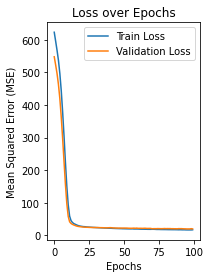

In [28]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()


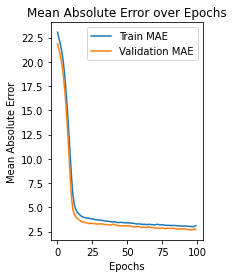

In [29]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

In [30]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [33]:
output = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 17.3764 - mae: 2.7400


In [34]:
print(f"Mean Squared Error: {output[0]}", f"Mean Absolute Error: {output[1]}", sep="\n")

Mean Squared Error: 17.376354217529297
Mean Absolute Error: 2.740030288696289
